# *** READ ME ***  
This kernel is the first code (1/3) used for the 2024 G3P in-situ evaluation.  
This code allows to extract monthly in-situ data and calculate GWLA and GWSA (if Sy values are furnished) using a grid-based approach. The Paris Basin is here take as an exemple.  
The inputs are: ParisBasin_GWL.xlsx (depths to groundwater levels) ; wells_Sy (coordonates and Sy values for wells)  
The outputs are: ParisBasin_GWLA_GWSA.xlsx
# *****************

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract in-situ time series

In [2]:
gwdf = pd.read_excel("ParisBasin_GWL.xlsx", index_col=0)
gwdf

,00238X0037/F,00342X0025/S1,00377X0051/S1,00441X0007/P,00444X0008/S1,00463X0036/H1,00465X0007/F,00471X0095/PZ2013,00474X0011/F,00516X0059/S1,...,01013X0004/S1,02636X0009/S1,00276X0030/F1,01193X0044/S1,01506X0016/P1,01191X0004/S1,01462X0079/S1,00376X0210/PZ1,01644X0033/F,01795X0011/S1
ID,,,,,,,,,,,,,,,,,,,,,
2002-04-30,16.086000,26.442000,37.876000,53.150000,32.278000,37.606000,69.692000,2.274000,76.452000,12.680000,...,39.607000,NaN,NaN,11.380000,64.068077,8.020000,15.930000,NaN,NaN,NaN
2002-05-31,16.715000,26.610000,37.637500,53.430000,31.917500,39.617500,69.942500,3.215000,77.190000,13.220000,...,39.598065,NaN,14.365000,12.250000,63.976452,10.350000,15.940000,29.430000,NaN,NaN
2002-06-30,17.000000,28.040000,37.710000,53.750000,32.337500,40.790000,70.375000,4.772500,78.020000,13.710000,...,40.176333,NaN,NaN,10.680000,63.865333,11.420000,16.010000,NaN,NaN,NaN
2002-07-31,17.286000,29.366000,37.996000,54.290000,33.136000,41.640000,70.802000,6.544000,78.902000,13.910000,...,40.519032,1.633750,14.845000,10.170000,63.793636,11.520000,16.040000,29.625000,NaN,NaN
2002-08-31,17.450000,30.437500,38.392500,54.875000,34.135000,42.292500,71.195000,8.227500,79.450000,14.470000,...,40.866129,1.676452,15.030000,9.640000,NaN,11.550000,16.220000,29.970000,NaN,16.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,16.514194,31.002903,44.023548,55.722258,40.089677,43.929032,72.976129,10.609032,80.536452,14.852258,...,NaN,1.623226,15.942903,13.380000,68.993226,11.473548,16.852258,33.791613,94.927419,19.195484
2023-06-30,17.348333,30.980667,44.040000,55.427667,39.863333,44.099333,72.931333,10.463000,80.512667,14.938333,...,NaN,1.719000,16.184000,13.437333,69.063000,11.680000,16.878333,33.876000,94.933333,19.370333
2023-07-31,17.650323,31.484516,44.047097,55.489032,39.919355,44.564194,73.098710,11.320645,80.560968,15.173226,...,NaN,1.828710,16.548387,13.039355,69.111935,NaN,16.938065,33.813548,94.925161,19.035161


In [3]:
# Some months are missing, and are then interpolate
gwdf_filled = gwdf.copy()
gwdf_filled.iloc[:, 1:] = gwdf.iloc[:, 1:].interpolate(method='linear', axis=0, limit_direction='both')
gwdf_filled

,00238X0037/F,00342X0025/S1,00377X0051/S1,00441X0007/P,00444X0008/S1,00463X0036/H1,00465X0007/F,00471X0095/PZ2013,00474X0011/F,00516X0059/S1,...,01013X0004/S1,02636X0009/S1,00276X0030/F1,01193X0044/S1,01506X0016/P1,01191X0004/S1,01462X0079/S1,00376X0210/PZ1,01644X0033/F,01795X0011/S1
ID,,,,,,,,,,,,,,,,,,,,,
2002-04-30,16.086000,26.442000,37.876000,53.150000,32.278000,37.606000,69.692000,2.274000,76.452000,12.680000,...,39.607000,1.633750,14.365000,11.380000,64.068077,8.020000,15.930000,29.430000,94.410000,16.900000
2002-05-31,16.715000,26.610000,37.637500,53.430000,31.917500,39.617500,69.942500,3.215000,77.190000,13.220000,...,39.598065,1.633750,14.365000,12.250000,63.976452,10.350000,15.940000,29.430000,94.410000,16.900000
2002-06-30,17.000000,28.040000,37.710000,53.750000,32.337500,40.790000,70.375000,4.772500,78.020000,13.710000,...,40.176333,1.633750,14.605000,10.680000,63.865333,11.420000,16.010000,29.527500,94.410000,16.900000
2002-07-31,17.286000,29.366000,37.996000,54.290000,33.136000,41.640000,70.802000,6.544000,78.902000,13.910000,...,40.519032,1.633750,14.845000,10.170000,63.793636,11.520000,16.040000,29.625000,94.410000,16.900000
2002-08-31,17.450000,30.437500,38.392500,54.875000,34.135000,42.292500,71.195000,8.227500,79.450000,14.470000,...,40.866129,1.676452,15.030000,9.640000,63.658111,11.550000,16.220000,29.970000,94.410000,16.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,16.514194,31.002903,44.023548,55.722258,40.089677,43.929032,72.976129,10.609032,80.536452,14.852258,...,44.570000,1.623226,15.942903,13.380000,68.993226,11.473548,16.852258,33.791613,94.927419,19.195484
2023-06-30,17.348333,30.980667,44.040000,55.427667,39.863333,44.099333,72.931333,10.463000,80.512667,14.938333,...,44.570000,1.719000,16.184000,13.437333,69.063000,11.680000,16.878333,33.876000,94.933333,19.370333
2023-07-31,17.650323,31.484516,44.047097,55.489032,39.919355,44.564194,73.098710,11.320645,80.560968,15.173226,...,44.570000,1.828710,16.548387,13.039355,69.111935,11.700000,16.938065,33.813548,94.925161,19.035161


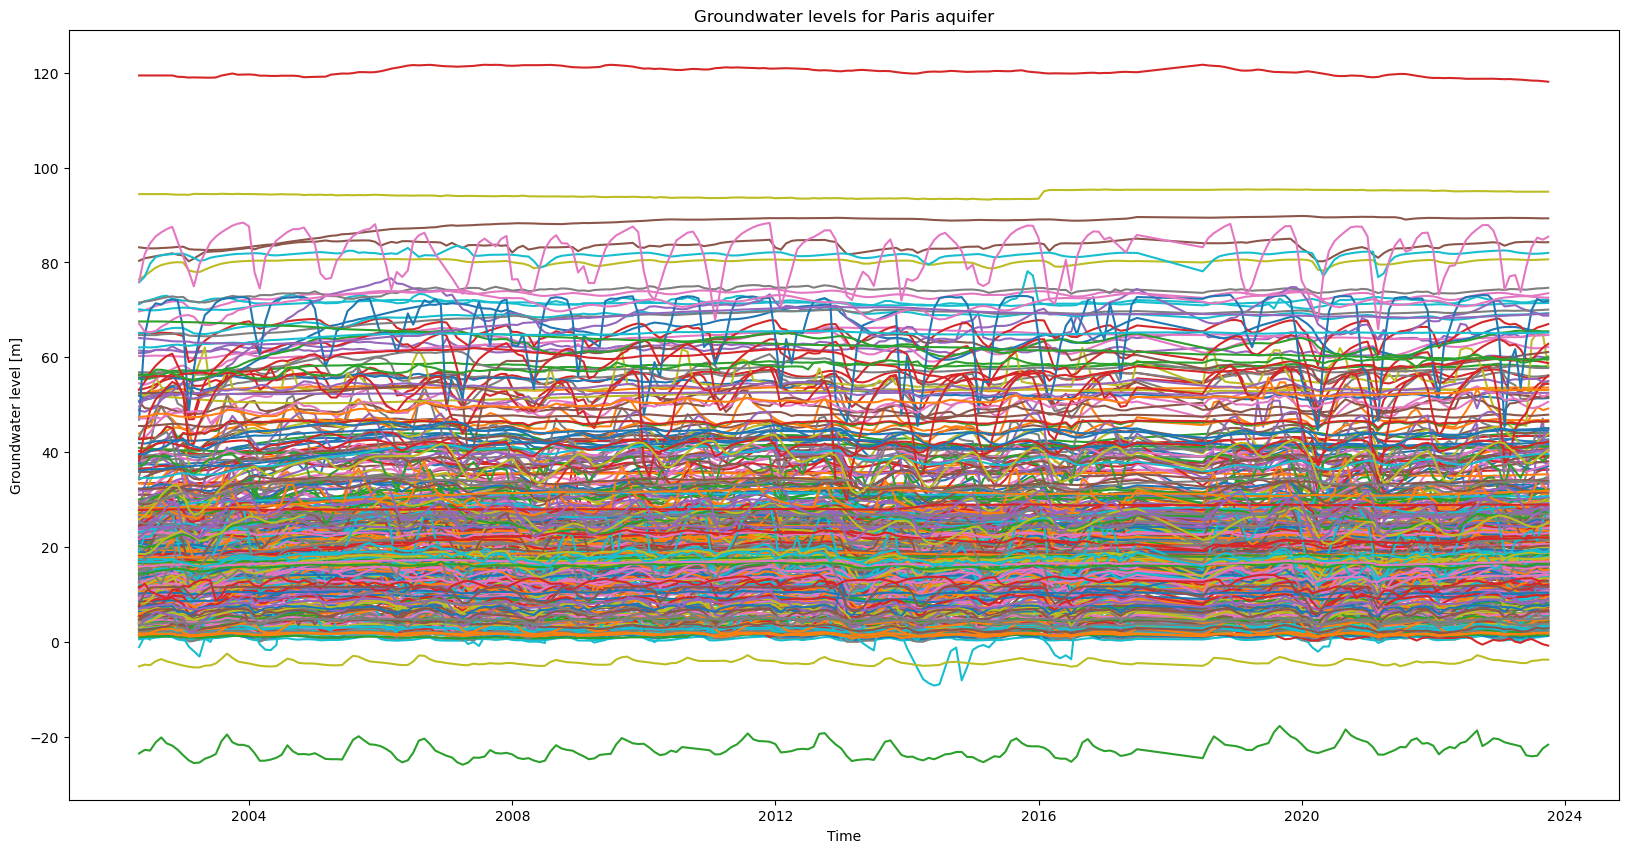

In [4]:
# First glance of the data
plt.figure(figsize=(20, 10))
plt.plot(gwdf_filled)
plt.title('Groundwater levels for Paris aquifer')
plt.xlabel('Time')
plt.ylabel('Groundwater level [m]')
plt.show()

# 2. Re-arrange data

In [5]:
# Create a df with: ID, date and water level
gwdf_melt = gwdf_filled.copy()
gwdf_melt = gwdf_melt.unstack().reset_index(name='water_level')

gwdf_melt.rename(columns={'ID': 'date'}, inplace=True)
gwdf_melt.rename(columns={'level_0': 'ID'}, inplace=True)
gwdf_melt.set_index('ID', inplace=True)

gwdf_melt

,date,water_level
ID,,
00238X0037/F,2002-04-30,16.086000
00238X0037/F,2002-05-31,16.715000
00238X0037/F,2002-06-30,17.000000
00238X0037/F,2002-07-31,17.286000
00238X0037/F,2002-08-31,17.450000
...,...,...
01795X0011/S1,2023-05-31,19.195484
01795X0011/S1,2023-06-30,19.370333
01795X0011/S1,2023-07-31,19.035161


In [6]:
long_df_melt = gwdf_melt.copy()
long_df_melt['mean_waterlevel'] = ''
long_df_melt

,date,water_level,mean_waterlevel
ID,,,
00238X0037/F,2002-04-30,16.086000,
00238X0037/F,2002-05-31,16.715000,
00238X0037/F,2002-06-30,17.000000,
00238X0037/F,2002-07-31,17.286000,
00238X0037/F,2002-08-31,17.450000,
...,...,...,...
01795X0011/S1,2023-05-31,19.195484,
01795X0011/S1,2023-06-30,19.370333,
01795X0011/S1,2023-07-31,19.035161,


In [7]:
# Obtain mean water level per site
waterlevel_means = long_df_melt.reset_index().groupby('ID', as_index=False)['water_level'].mean()
waterlevel_means.set_index('ID', inplace=True)
waterlevel_means.rename(columns={'water_level': 'mean_waterlevel'}, inplace=True)
waterlevel_means

,mean_waterlevel
ID,
00107X0006/P1,50.917182
00115X0011/P1,20.877297
00146B0007/F1,6.597720
00147D0218/P1,12.572104
00167X0001/P1,28.469137
...,...
06123X0044/S,16.252611
06124X0026/F,5.648139
06131X0035/DAUFFA,18.314012


In [8]:
# Complete previous df with mean_waterlevel
long_df_melt['mean_waterlevel'] = long_df_melt.index.map(waterlevel_means['mean_waterlevel'])
long_df_melt

,date,water_level,mean_waterlevel
ID,,,
00238X0037/F,2002-04-30,16.086000,16.839293
00238X0037/F,2002-05-31,16.715000,16.839293
00238X0037/F,2002-06-30,17.000000,16.839293
00238X0037/F,2002-07-31,17.286000,16.839293
00238X0037/F,2002-08-31,17.450000,16.839293
...,...,...,...
01795X0011/S1,2023-05-31,19.195484,17.863384
01795X0011/S1,2023-06-30,19.370333,17.863384
01795X0011/S1,2023-07-31,19.035161,17.863384


In [9]:
# Calculate montlhy GWLA[m] per site
final_gwdf = long_df_melt.copy()
final_gwdf.reset_index(inplace=True)
final_gwdf = final_gwdf.set_index("ID")

final_gwdf['GWLA'] = final_gwdf['mean_waterlevel'] - final_gwdf['water_level'] # Not the other way arround, because in-situ data are DEPTHS TO GWL
                                                                               # and not directly GWL.
        
final_gwdf

,date,water_level,mean_waterlevel,GWLA
ID,,,,
00238X0037/F,2002-04-30,16.086000,16.839293,0.753293
00238X0037/F,2002-05-31,16.715000,16.839293,0.124293
00238X0037/F,2002-06-30,17.000000,16.839293,-0.160707
00238X0037/F,2002-07-31,17.286000,16.839293,-0.446707
00238X0037/F,2002-08-31,17.450000,16.839293,-0.610707
...,...,...,...,...
01795X0011/S1,2023-05-31,19.195484,17.863384,-1.332100
01795X0011/S1,2023-06-30,19.370333,17.863384,-1.506950
01795X0011/S1,2023-07-31,19.035161,17.863384,-1.171778


# 2.5. Computing GWSA by bringing wells-Sy values from QGIS calculations (OPTIONAL)

In [10]:
# Here, we extract Sy values for each cell
wells_sy = pd.read_excel("wells_Sy.xlsx").set_index('ID').filter(['sy_min','sy_ave'], axis=1) # Different Sy values can be extract
wells_sy

,sy_min,sy_ave
ID,,
00238X0037/F,0.010383,0.057217
00342X0025/S1,0.010383,0.057217
00377X0051/S1,0.010383,0.057217
00441X0007/P,0.010383,0.057217
00444X0008/S1,0.010383,0.057217
...,...,...
01191X0004/S1,0.002500,0.027500
01462X0079/S1,0.002500,0.027500
00376X0210/PZ1,0.010383,0.057217


In [11]:
final_gwdf = final_gwdf.merge(wells_sy[['sy_min','sy_ave']], left_index=True, right_index=True)
final_gwdf

,date,water_level,mean_waterlevel,GWLA,sy_min,sy_ave
ID,,,,,,
00107X0006/P1,2002-04-30,38.260000,50.917182,12.657182,0.010383,0.057217
00107X0006/P1,2002-05-31,44.340000,50.917182,6.577182,0.010383,0.057217
00107X0006/P1,2002-06-30,48.775000,50.917182,2.142182,0.010383,0.057217
00107X0006/P1,2002-07-31,51.152000,50.917182,-0.234818,0.010383,0.057217
00107X0006/P1,2002-08-31,52.212500,50.917182,-1.295318,0.010383,0.057217
...,...,...,...,...,...,...
06143X0011/S,2023-05-31,10.020000,9.607128,-0.412872,0.046325,0.140008
06143X0011/S,2023-06-30,10.217667,9.607128,-0.610538,0.046325,0.140008
06143X0011/S,2023-07-31,10.479355,9.607128,-0.872226,0.046325,0.140008


In [12]:
# We compute GWSA[mm] for each time series of each well, using the equation: GWSA = GWLA * Sy
final_gwdf['minGWSA'] = final_gwdf['GWLA'] * final_gwdf['sy_min'] * 1000
final_gwdf['aveGWSA'] = final_gwdf['GWLA'] * final_gwdf['sy_ave'] * 1000
final_gwdf

,date,water_level,mean_waterlevel,GWLA,sy_min,sy_ave,minGWSA,aveGWSA
ID,,,,,,,,
00107X0006/P1,2002-04-30,38.260000,50.917182,12.657182,0.010383,0.057217,131.423745,724.201790
00107X0006/P1,2002-05-31,44.340000,50.917182,6.577182,0.010383,0.057217,68.293078,376.324456
00107X0006/P1,2002-06-30,48.775000,50.917182,2.142182,0.010383,0.057217,22.242995,122.568540
00107X0006/P1,2002-07-31,51.152000,50.917182,-0.234818,0.010383,0.057217,-2.438189,-13.435477
00107X0006/P1,2002-08-31,52.212500,50.917182,-1.295318,0.010383,0.057217,-13.449714,-74.113752
...,...,...,...,...,...,...,...,...
06143X0011/S,2023-05-31,10.020000,9.607128,-0.412872,0.046325,0.140008,-19.126276,-57.805462
06143X0011/S,2023-06-30,10.217667,9.607128,-0.610538,0.046325,0.140008,-28.283184,-85.480442
06143X0011/S,2023-07-31,10.479355,9.607128,-0.872226,0.046325,0.140008,-40.405889,-122.118967


# 3. Grid-based approach  
This method is used to reduce over-representation of possible wells clusters in the aquifer. To do that, we create a grid similar of the G3P one, and attribute a cell to each well. This way, instead of calculating an average of all wells at each time step (month), we calculate an average on each cell, and then averaging the cells together.

In [13]:
# 1) Extract coordonates of the wells
df_gps = pd.read_excel("wells_Sy.xlsx", usecols="A:C", names=["ID", "latitude", "longitude"], header=0)
df_gps.set_index("ID", inplace=True)

df_combined = final_gwdf.join(df_gps).drop(columns=['water_level', 'mean_waterlevel'])
df_combined['latitude'] = pd.to_numeric(df_combined['latitude'], errors='coerce')
df_combined['longitude'] = pd.to_numeric(df_combined['longitude'], errors='coerce')
df_combined

,date,GWLA,sy_min,sy_ave,minGWSA,aveGWSA,latitude,longitude
ID,,,,,,,,
00107X0006/P1,2002-04-30,12.657182,0.010383,0.057217,131.423745,724.201790,50.599128,1.680733
00107X0006/P1,2002-05-31,6.577182,0.010383,0.057217,68.293078,376.324456,50.599128,1.680733
00107X0006/P1,2002-06-30,2.142182,0.010383,0.057217,22.242995,122.568540,50.599128,1.680733
00107X0006/P1,2002-07-31,-0.234818,0.010383,0.057217,-2.438189,-13.435477,50.599128,1.680733
00107X0006/P1,2002-08-31,-1.295318,0.010383,0.057217,-13.449714,-74.113752,50.599128,1.680733
...,...,...,...,...,...,...,...,...
06143X0011/S,2023-05-31,-0.412872,0.046325,0.140008,-19.126276,-57.805462,46.434841,0.912525
06143X0011/S,2023-06-30,-0.610538,0.046325,0.140008,-28.283184,-85.480442,46.434841,0.912525
06143X0011/S,2023-07-31,-0.872226,0.046325,0.140008,-40.405889,-122.118967,46.434841,0.912525


In [14]:
# We save that step for later (correlation map)
df_combined.to_excel('df_combined.xlsx')

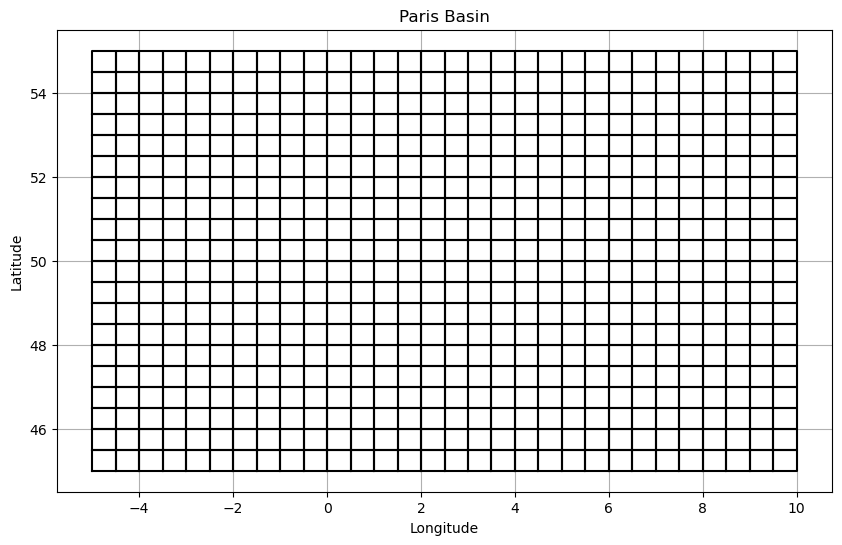

In [15]:
# 2) Create the grid. Please adapt the coordonates to the aquifer.
min_lat = 45
max_lat = 55
min_lon = -5
max_lon = 10 
resolution = 0.5

num_lat_cells = int((max_lat - min_lat) / resolution)
num_lon_cells = int((max_lon - min_lon) / resolution)
lats = np.linspace(min_lat, max_lat, num_lat_cells + 1)
lons = np.linspace(min_lon, max_lon, num_lon_cells + 1)
grid_coordinates = [(lat1, lon1, lat2, lon2) for lat1, lat2 in zip(lats[:-1], lats[1:]) for lon1, lon2 in zip(lons[:-1], lons[1:])]

plt.figure(figsize=(10, 6))
for lat1, lon1, lat2, lon2 in grid_coordinates:
    plt.plot([lon1, lon2, lon2, lon1, lon1], [lat1, lat1, lat2, lat2, lat1], 'k-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Paris Basin')
plt.grid(True)

plt.show()

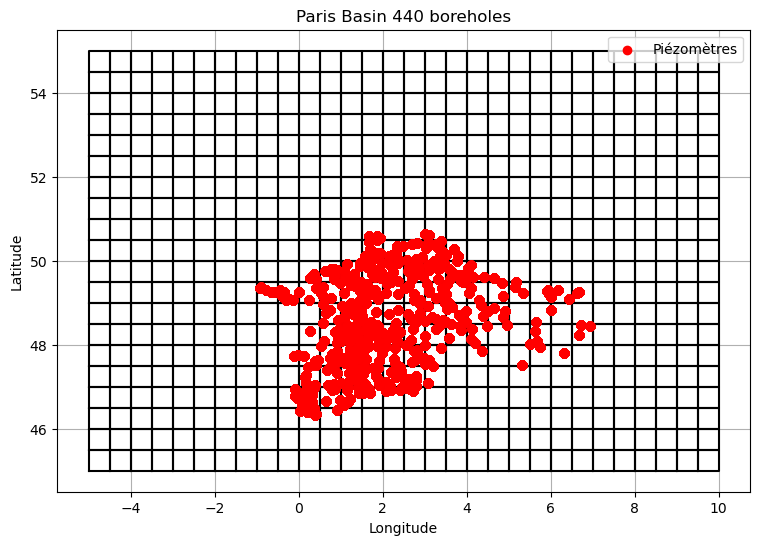

In [16]:
# 3) Plot both grid and wells

plt.figure(figsize=(10, 6))
for lat1, lon1, lat2, lon2 in grid_coordinates:
    plt.plot([lon1, lon2, lon2, lon1, lon1], [lat1, lat1, lat2, lat2, lat1], 'k-')

plt.scatter(df_combined['longitude'], df_combined['latitude'], color='red', label='Piézomètres', zorder=2)

plt.legend(loc='upper right')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Paris Basin 440 boreholes')

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, zorder=1)

plt.show()

In [17]:
# 4) Assign a cell for each well
def assign_piezometers_to_grid(df_gps, grid_coordinates):
    df_gps['grid_cell'] = None
    
    # Browse each well
    for index, row in df_gps.iterrows():
        # Retrieve the coordinates of the well
        lat_piezometer, lon_piezometer = row['latitude'], row['longitude']
        
        # Browse each cell of the grid to find the one corresponding to the well
        for i, (lat1, lon1, lat2, lon2) in enumerate(grid_coordinates):
            # Check if the well coordinates are inside this cell
            if lat1 <= lat_piezometer <= lat2 and lon1 <= lon_piezometer <= lon2:
                # Assign the corresponding cell to the well
                df_gps.at[index, 'grid_cell'] = i
                break  # Exit the loop once the cell has been found
    
    return df_gps

df_gps_assigned = assign_piezometers_to_grid(df_gps, grid_coordinates)
df_gps_assigned

,latitude,longitude,grid_cell
ID,,,
00238X0037/F,50.277980,1.708529,313
00342X0025/S1,50.206479,2.323738,314
00377X0051/S1,50.124795,3.503569,317
00441X0007/P,49.957053,1.473474,282
00444X0008/S1,50.019654,1.757927,313
...,...,...,...
01191X0004/S1,49.263122,-0.659120,248
01462X0079/S1,49.078654,-0.227855,249
00376X0210/PZ1,50.110008,3.363812,316


In [18]:
# Merged dfs together
merged_df = df_combined.merge(df_gps_assigned, left_on='ID', right_index=True)
merged_df.drop(['latitude_y', 'longitude_y'], axis=1, inplace=True)
merged_df.rename(columns={'latitude_x': 'latitude', 'longitude_x': 'longitude'}, inplace=True)

merged_df

,date,GWLA,sy_min,sy_ave,minGWSA,aveGWSA,latitude,longitude,grid_cell
ID,,,,,,,,,
00107X0006/P1,2002-04-30,12.657182,0.010383,0.057217,131.423745,724.201790,50.599128,1.680733,343
00107X0006/P1,2002-05-31,6.577182,0.010383,0.057217,68.293078,376.324456,50.599128,1.680733,343
00107X0006/P1,2002-06-30,2.142182,0.010383,0.057217,22.242995,122.568540,50.599128,1.680733,343
00107X0006/P1,2002-07-31,-0.234818,0.010383,0.057217,-2.438189,-13.435477,50.599128,1.680733,343
00107X0006/P1,2002-08-31,-1.295318,0.010383,0.057217,-13.449714,-74.113752,50.599128,1.680733,343
...,...,...,...,...,...,...,...,...,...
06143X0011/S,2023-05-31,-0.412872,0.046325,0.140008,-19.126276,-57.805462,46.434841,0.912525,71
06143X0011/S,2023-06-30,-0.610538,0.046325,0.140008,-28.283184,-85.480442,46.434841,0.912525,71
06143X0011/S,2023-07-31,-0.872226,0.046325,0.140008,-40.405889,-122.118967,46.434841,0.912525,71


In [19]:
# 5) Final step, averaging wells the each cell, and averaging all cells together
monthly_cell_average = merged_df.groupby(['date', 'grid_cell']).agg({'GWLA': 'mean', 'minGWSA': 'mean', 'aveGWSA': 'mean'}).reset_index().sort_values(by=['grid_cell', 'date']).set_index('date')
monthly_cell_average # a df with GWLA and GWSAs time series, for each cell

,grid_cell,GWLA,minGWSA,aveGWSA
date,,,,
2002-04-30,70,3.078810,26.874861,111.505619
2002-05-31,70,1.828449,20.107799,72.025102
2002-06-30,70,1.548976,12.878744,55.200685
2002-07-31,70,-1.258863,-0.959416,-31.557095
2002-08-31,70,-2.734884,-7.870873,-76.655867
...,...,...,...,...
2023-05-31,346,1.839428,115.201057,225.909741
2023-06-30,346,1.770245,112.069368,218.921178
2023-07-31,346,1.363299,102.858541,189.377515


In [20]:
# Then we average all the cells together, for each month
grid_based_monthly_average = monthly_cell_average.groupby('date').agg({'GWLA': 'mean', 'minGWSA': 'mean', 'aveGWSA': 'mean'}).reset_index()
grid_based_monthly_average.set_index('date', inplace=True)
grid_based_monthly_average

,GWLA,minGWSA,aveGWSA
date,,,
2002-04-30,2.369726,44.752361,154.189115
2002-05-31,1.759220,34.251762,118.908467
2002-06-30,1.364703,28.934388,96.952304
2002-07-31,0.812118,19.158358,64.018078
2002-08-31,0.450385,12.799260,41.621935
...,...,...,...
2023-05-31,-0.163681,-5.972412,-13.918581
2023-06-30,-0.632925,-15.611402,-42.288552
2023-07-31,-1.022592,-23.951753,-67.816790


# 4. GWLA Plotting

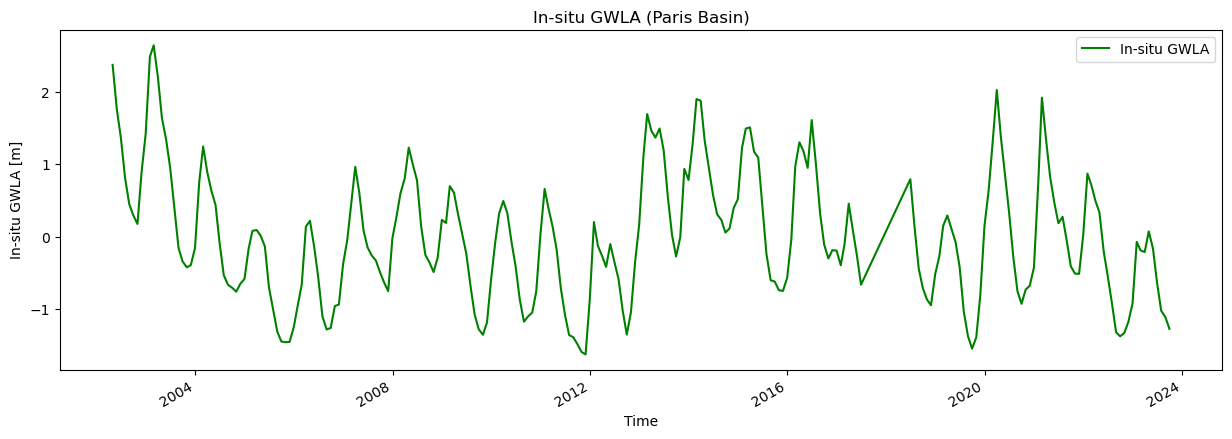

In [21]:
plt.figure(figsize=(15,5))

grid_based_monthly_average['GWLA'].plot(label='In-situ GWLA', color='green')

plt.xlabel('Time')
plt.ylabel('In-situ GWLA [m]')
plt.title('In-situ GWLA (Paris Basin)')
plt.legend()

plt.show()

# 4.5. GWSAs Plotting

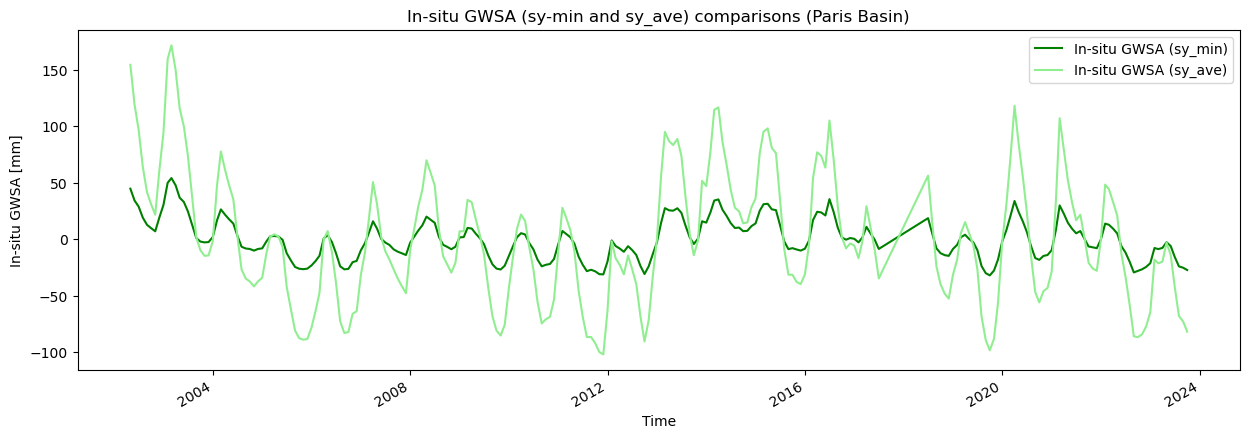

In [22]:
plt.figure(figsize=(15,5))

grid_based_monthly_average['minGWSA'].plot(label='In-situ GWSA (sy_min)', color='green')
grid_based_monthly_average['aveGWSA'].plot(label='In-situ GWSA (sy_ave)', color='lightgreen')

plt.xlabel('Time')
plt.ylabel('In-situ GWSA [mm]')
plt.title('In-situ GWSA (sy-min and sy_ave) comparisons (Paris Basin)')
plt.legend()

plt.show()

# Exportation

In [23]:
grid_based_monthly_average.to_excel('ParisBasin_GWLA_GWSA.xlsx')